In [ ]:
!pip uninstall numpy pandas
!pip install numpy==1.25.2 pandas==2.1.1


In [ ]:
# 查看python 版本与环境
!python3 --version
!which python3

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests
import os
import re


# Collect data

In [ ]:

# # 设置日期范围
# start_date = datetime.strptime("2019-01-01", "%Y-%m-%d")
# end_date = datetime.strptime("2024-10-31", "%Y-%m-%d")

# # 初始化浏览器
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')  # 无头模式，不显示浏览器界面
# driver = webdriver.Chrome(options=options)

# # 设置下载路径
# download_folder = "./data"
# if not os.path.exists(download_folder):
#     os.makedirs(download_folder)

# # 定义初始页码
# page = 1
# all_reports = []

# # 循环翻页
# while True:
#     # 构造URL
#     url = f"https://www.sgx.com/securities/data-reports?reportType=203&page={page}&pagesize=100"
#     driver.get(url)
#     time.sleep(2)  # 等待页面加载

#     # 抓取当前页所有报告数据
#     reports = driver.find_elements(By.CLASS_NAME, "article-list-result")
#     if not reports:
#         print("No more reports found, stopping.")
#         break

#     # 处理每个报告
#     for report in reports:
#         try:
#             # 获取报告日期
#             date_text = report.find_element(By.CLASS_NAME, "timestamp").text.strip()
#             report_date = datetime.strptime(date_text, "%d %b %Y")
            
#             # 检查日期范围
#             if start_date <= report_date <= end_date:
#                 # 获取报告标题和链接
#                 title_element = report.find_element(By.CLASS_NAME, "article-list-result-item-link")
#                 title = title_element.text.strip()
#                 link = title_element.get_attribute("href")
                
#                 # 判断文件类型
#                 file_extension = ".xlsx" if "xlsx" in link else ".pdf"
                
#                 # 替换掉文件名中不允许的字符
#                 safe_title = re.sub(r'[\\/:"*?<>|]', '_', title)
#                 file_path = os.path.join(download_folder, f"{report_date.date()}_{safe_title}{file_extension}")

#                 # 下载报告
#                 response = requests.get(link, stream=True)
#                 if response.status_code == 200:
#                     with open(file_path, "wb") as file:
#                         file.write(response.content)
#                     print(f"Downloaded: {file_path}")
#                 else:
#                     print(f"Failed to download {title}")

#                 # 打印报告信息
#                 print(f"{report_date.date()}: {title} - {link}")

#         except Exception as e:
#             print("Error processing report:", e)
#             continue

#     # 移动到下一页
#     page += 1
#     time.sleep(1)

# # 关闭浏览器
# driver.quit()

# # 打印报告数量
# print(f"Total reports found: {len(all_reports)}")


# Cleaning the data

In [28]:
# root='./data/'
# fail_name='fail_list.csv'
# fail_data_path = os.path.join(root, fail_name)
# fail_df= pd.read_csv(fail_data_path)

# # 取出Stock_Code，写成list
# fail_list = fail_df['Stock_Code'].tolist()

# # 把df里stock code在fail_list里的数据删除
# df_tem = df[~df['Stock Code'].isin(fail_list)]

# root='./data/'
# tmp_data_name='data_tmp.csv'
# tmp_data_path = os.path.join(root, tmp_data_name)

# df_tem.to_csv(tmp_data_path, index=False)
# print(df_tem.head())


         Date             Stock Name Stock Code     Amount Investor Type  \
0  2019-01-07     Keppel Corporation        BN4 -20.708603        retail   
1  2019-01-07  CapitaLand Mall Trust       C38U   5.340867        retail   
3  2019-01-07        Silverlake Axis        5CP   5.098878        retail   
5  2019-01-07                StarHub        CC3   3.617937        retail   
6  2019-01-07    Haw Paw Corporation        H02   3.031355        retail   

  Action  
0   sell  
1    buy  
3    buy  
5    buy  
6    buy  


In [36]:
root='./data/'
df_name='cleaned_data.csv'
data_path = os.path.join(root, df_name)
df= pd.read_csv(data_path)

print(df.head())
print(df.columns)
print(df.info())

         Date                Stock Name Stock Code     Amount Investor Type  \
0  2019-01-07        Keppel Corporation        BN4 -20.708603        retail   
1  2019-01-07     CapitaLand Mall Trust       C38U   5.340867        retail   
2  2019-01-07        Hi-P International        H17   5.099238        retail   
3  2019-01-07           Silverlake Axis        5CP   5.098878        retail   
4  2019-01-07  Best World International        CGN   3.879127        retail   

  Action  
0   sell  
1    buy  
2    buy  
3    buy  
4    buy  
Index(['Date', 'Stock Name', 'Stock Code', 'Amount', 'Investor Type',
       'Action'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11920 entries, 0 to 11919
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           11920 non-null  object 
 1   Stock Name     11920 non-null  object 
 2   Stock Code     11920 non-null  object 
 3   Amount         1

In [37]:
# 筛选date从Jan 2019 to Oct 2024. 
df['Date'] = pd.to_datetime(df['Date'])
start_date = '2019-01-01'
end_date = '2024-10-31'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


In [40]:
import yfinance as yf
root='./data/'
df_stock_name='stock.csv'
df_stock_info_name='stock_info.csv'
data_path = os.path.join(root, df_stock_name)
stock_info_path = os.path.join(root, df_stock_info_name)
unique_stocks = df[['Stock Code']].drop_duplicates()
unique_stocks['Stock_Code_yh'] = unique_stocks['Stock Code'].apply(lambda x: x + '.SI' if x not in ['NIO', 'EMI'] else x)
stock_list = unique_stocks['Stock_Code_yh'].tolist()
# Save unique stocks to CSV (optional)
unique_stocks.to_csv(data_path, index=False)

df['Date'] = pd.to_datetime(df['Date'])

# 定义起始和结束日期
start_date =df['Date'].min()
end_date = df['Date'].max()

# 创建一个空的 DataFrame
combined_data = pd.DataFrame()
fail_list = []

# 下载每个股票的数据，并合并到一个 DataFrame
for stock in stock_list:
    print(f"Downloading data for {stock}")
    ticker = yf.Ticker(stock)
    try:
        # 下载历史数据
        temp_data = ticker.history(start=start_date, end=end_date, interval="1d")
        # 确保数据不为空
        if not temp_data.empty:
            # 重置索引并添加股票代码列
            temp_data.reset_index(inplace=True)
            temp_data['Stock Code'] = stock
            # 将日期列转换为新加坡时间
            temp_data['Date'] = temp_data['Date'].dt.tz_convert('Asia/Singapore')

            # 合并到总数据中
            combined_data = pd.concat([combined_data, temp_data])
        else:
            fail_list.append(stock)
    except Exception as e:
        fail_list.append(stock)
        print(f"Failed to download data for {stock}: {e}")

$H17.SI: possibly delisted; no timezone found


$CGN.SI: possibly delisted; no timezone found


$K11.SI: possibly delisted; no timezone found


$5UZ.SI: possibly delisted; no timezone found
$S51.SI: possibly delisted; no timezone found


$C31.SI: possibly delisted; no timezone found
$B2F.SI: possibly delisted; no timezone found


$RF1U.SI: possibly delisted; no timezone found
$VL6.SI: possibly delisted; no timezone found


$ND8U.SI: possibly delisted; no timezone found


$A68U.SI: possibly delisted; no timezone found


$RW0U.SI: possibly delisted; no timezone found


$C61U.SI: possibly delisted; no timezone found


$5ME.SI: possibly delisted; no timezone found


$U04.SI: possibly delisted; no timezone found


$T39.SI: possibly delisted; no timezone found


$CH8.SI: possibly delisted; no timezone found


$O32.SI: possibly delisted; no timezone found


$J37.SI: possibly delisted; no timezone found


$BOL.SI: possibly delisted; no timezone found


$CNNU.SI: possibly delisted; no timezone found


$F25U.SI: possibly delisted; no timezone found


$588.SI: possibly delisted; no timezone found


$BQO.SI: possibly delisted; no timezone found


$Q1P.SI: possibly delisted; no timezone found


$AYL.SI: possibly delisted; no timezone found


$CEE.SI: possibly delisted; no timezone found


$B16.SI: possibly delisted; no timezone found


$CTN.SI: possibly delisted; no timezone found


$42U.SI: possibly delisted; no timezone found


$40S.SI: possibly delisted; no timezone found


$41A.SI: possibly delisted; no timezone found


$5OT.SI: possibly delisted; no timezone found


$M1Z.SI: possibly delisted; no timezone found


$ADQU.SI: possibly delisted; no timezone found


$5H0.SI: possibly delisted; no timezone found


$K2LU.SI: possibly delisted; no timezone found


$L03.SI: possibly delisted; no timezone found


$VTA.SI: possibly delisted; no timezone found


$PGU.SI: possibly delisted; no timezone found


$AUE.SI: possibly delisted; no timezone found


$C29.SI: possibly delisted; no timezone found


$NTA.SI: possibly delisted; no timezone found


$AVM.SI: possibly delisted; no timezone found


$G41.SI: possibly delisted; no timezone found


$EMI: possibly delisted; no price data found  (1d 2019-01-07 00:00:00 -> 2024-10-28 00:00:00)


In [41]:
combined_data.head()
combined_data.reset_index(inplace=True)
combined_data.to_csv(stock_info_path, index=False)


In [42]:
combined_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock Code,Capital Gains
0,0,2019-01-07,2.761576,2.761576,2.729834,2.761576,5820945,0.0,0.0,BN4.SI,NaN
1,1,2019-01-08,2.766110,2.802387,2.747972,2.793318,4266142,0.0,0.0,BN4.SI,NaN
2,2,2019-01-09,2.797853,2.806922,2.770645,2.802387,5765512,0.0,0.0,BN4.SI,NaN
3,3,2019-01-10,2.797853,2.829595,2.779714,2.820526,3900000,0.0,0.0,BN4.SI,NaN
4,4,2019-01-11,2.829595,2.843199,2.820526,2.834130,3369134,0.0,0.0,BN4.SI,NaN


In [48]:
stock_df_name='stock_info.csv'
stock_data_path = os.path.join(root, stock_df_name)
stock_df= pd.read_csv(stock_data_path)
print(stock_df.head())

# stock_df drop Dividends,Stock Splits,
stock_df = stock_df.drop(['Dividends', 'Stock Splits','Capital Gains'], axis=1)
# 将Date列转换为日期时间类型
stock_df['Date'] = pd.to_datetime(stock_df['Date'], utc=True)

stock_df['Date'] = stock_df['Date'].dt.strftime('%Y-%m-%d')
# 筛选date在df_date范围内的数据
df_date = df['Date'].unique()
stock_df = stock_df[stock_df['Date'].isin(df_date)]

print(stock_df.head())

# stock_df把Stock_Code都保留.之前的部分
stock_df['Stock Code'] = stock_df['Stock Code'].apply(lambda x: x.split('.')[0])
print(stock_df.head())

   index                       Date      Open      High       Low     Close  \
0      0  2019-01-07 00:00:00+08:00  2.761576  2.761576  2.729834  2.761576   
1      1  2019-01-08 00:00:00+08:00  2.766110  2.802387  2.747972  2.793318   
2      2  2019-01-09 00:00:00+08:00  2.797853  2.806922  2.770645  2.802387   
3      3  2019-01-10 00:00:00+08:00  2.797853  2.829595  2.779714  2.820526   
4      4  2019-01-11 00:00:00+08:00  2.829595  2.843199  2.820526  2.834130   

    Volume  Dividends  Stock Splits Stock Code  Capital Gains  
0  5820945        0.0           0.0     BN4.SI            NaN  
1  4266142        0.0           0.0     BN4.SI            NaN  
2  5765512        0.0           0.0     BN4.SI            NaN  
3  3900000        0.0           0.0     BN4.SI            NaN  
4  3369134        0.0           0.0     BN4.SI            NaN  
    index        Date      Open      High       Low     Close   Volume  \
1       1  2019-01-07  2.766110  2.802387  2.747972  2.793318  4266

In [50]:
stock_df.drop_duplicates(inplace=True)
stock_df.head()
stock_df.drop('index', axis=1, inplace=True)
stock_df.reset_index(drop=True, inplace=True)


In [51]:
stock_data_path = os.path.join(root, 'stock_info_clean.csv')
stock_df.to_csv(stock_data_path, index=False)

In [40]:
# # 对fail_list里面对stock，去df里面找stock_name，然后找到对应对stock_code_yh，存到fail_list.csv里面
# unique_stocks = df[['Stock_Code', 'Stock_Name']].drop_duplicates()
# unique_stocks['Stock_Code_yh'] = unique_stocks['Stock_Code'].apply(lambda x: x + '.SI' if x not in ['NIO', 'EMI'] else x)

# fail_list_df = pd.DataFrame(fail_list, columns=['Stock_Code_yh'])
# fail_list_df = pd.merge(fail_list_df, unique_stocks, on='Stock_Code_yh', how='left')
# # 大小写也算一样
# fail_list_df['Stock_Code_yh'] = fail_list_df['Stock_Code_yh'].str.upper()
# fail_list_df['Stock_Code'] = fail_list_df['Stock_Code'].str.upper()
# fail_list_df['Stock_Name'] = fail_list_df['Stock_Name'].str.upper()
# # 去除所有的空格
# fail_list_df['Stock_Code_yh'] = fail_list_df['Stock_Code_yh'].str.strip()
# fail_list_df['Stock_Code'] = fail_list_df['Stock_Code'].str.strip()
# fail_list_df['Stock_Name'] = fail_list_df['Stock_Name'].str.strip()

# fail_list_df.drop_duplicates(inplace=True)
# fail_list_df.to_csv('fail_list.csv', index=False)


In [52]:
# df.to_csv('data.csv', index=False)

# Discuss how the fund flow numbers look like during the Covid period

## 1. brief discussion(retail vs institution)

/var/folders/vg/_vz93q_92fs1ccm0mgpqmr0h0000gp/T/ipykernel_25576/3145636611.py:24: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis="x", nbins=12)  # Reduce the number of x-axis labels


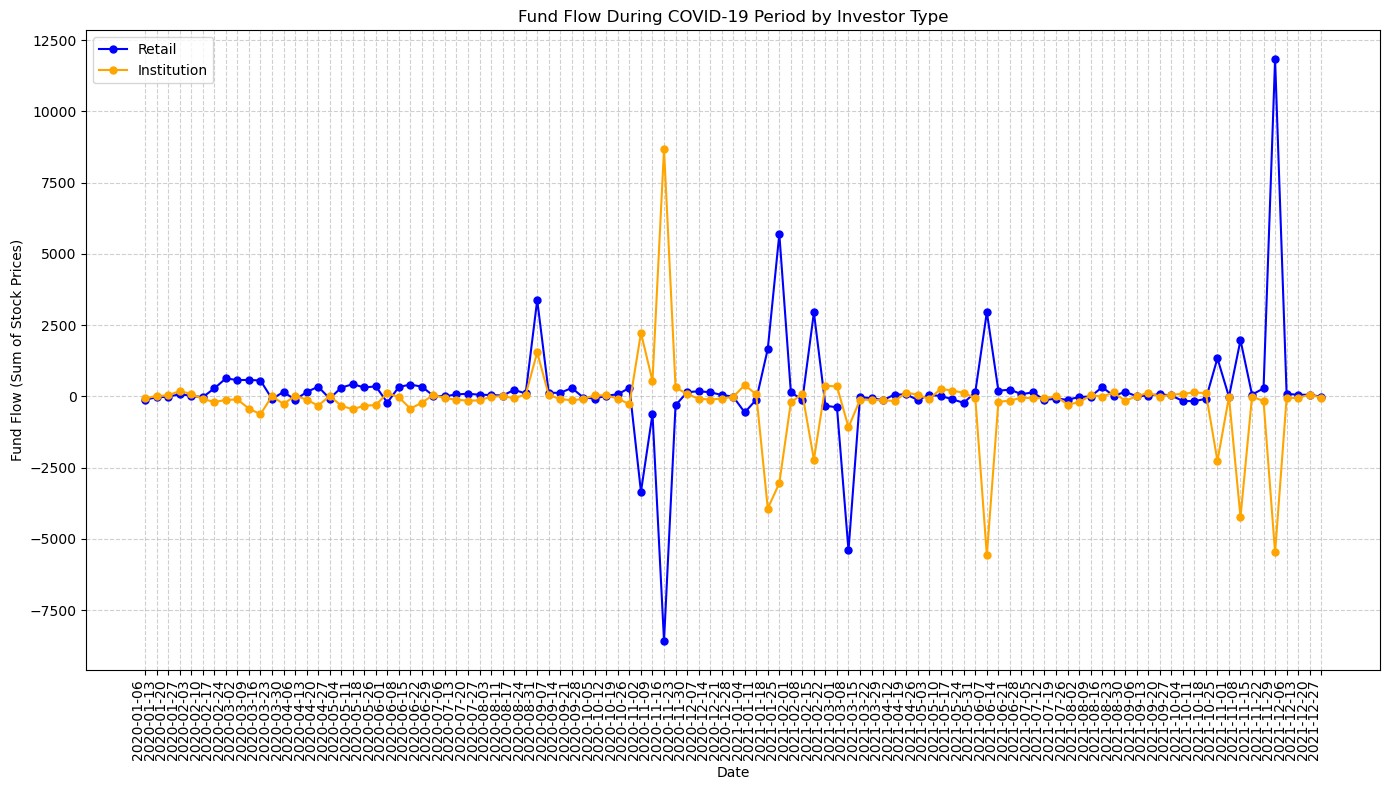

In [66]:
# Convert date to datetime format
# Filter for the COVID-19 period (for example: 2020-01-01 to 2021-12-31)
covid_period = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2021-12-31')]

# Aggregate fund flow data by date, investor type, and action
covid_summary = covid_period.groupby(['Date', 'Investor_Type']).agg({'Stock_Price': 'sum'}).reset_index()

# Separate data for retail and institution
retail_data = covid_summary[covid_summary['Investor_Type'] == 'retail']
institution_data = covid_summary[covid_summary['Investor_Type'] == 'institution']

# Plotting retail and institution fund flows
plt.figure(figsize=(14, 8))
plt.plot(retail_data['Date'], retail_data['Stock_Price'], label="Retail", marker='o', linestyle='-', markersize=5, color='blue')
plt.plot(institution_data['Date'], institution_data['Stock_Price'], label="Institution", marker='o', linestyle='-', markersize=5, color='orange')

# Add titles and labels
plt.title("Fund Flow During COVID-19 Period by Investor Type")
plt.xlabel("Date")
plt.ylabel("Fund Flow (Sum of Stock Prices)")

# Customize x-axis for better readability
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.locator_params(axis="x", nbins=12)  # Reduce the number of x-axis labels

# Add legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot with a tight layout
plt.tight_layout()
plt.show()

- **Retail Investors**: Showed reactive behavior, especially around negative news, with frequent buy and sell cycles. Their responses to market events appear more sentiment-driven, leading to erratic patterns in fund flows.
- **Institutional Investors**: Displayed strategic positioning, with significant buying around key recovery events and less frequent sell-offs. Their approach suggests a more calculated strategy focused on long-term market recovery potential.

In [71]:
print(covid_period.tail())

             Date                 Stock_Name Stock_Code  Stock_Price  \
24414  2021-12-27  Mapletree Logistics Trust       M44U     2.901645   
24417  2021-12-27      Top Glove Corporation        BVA     4.284396   
24412  2021-12-27     Ascott Residence Trust        HMN     2.817068   
24411  2021-12-27                        SPH        T39     2.356709   
24413  2021-12-27   Yangzijiang Shipbuilding        BS6     2.856564   

      Investor_Type Action  
24414   institution    buy  
24417   institution    buy  
24412   institution    buy  
24411   institution    buy  
24413   institution    buy  


# 2. action around important event

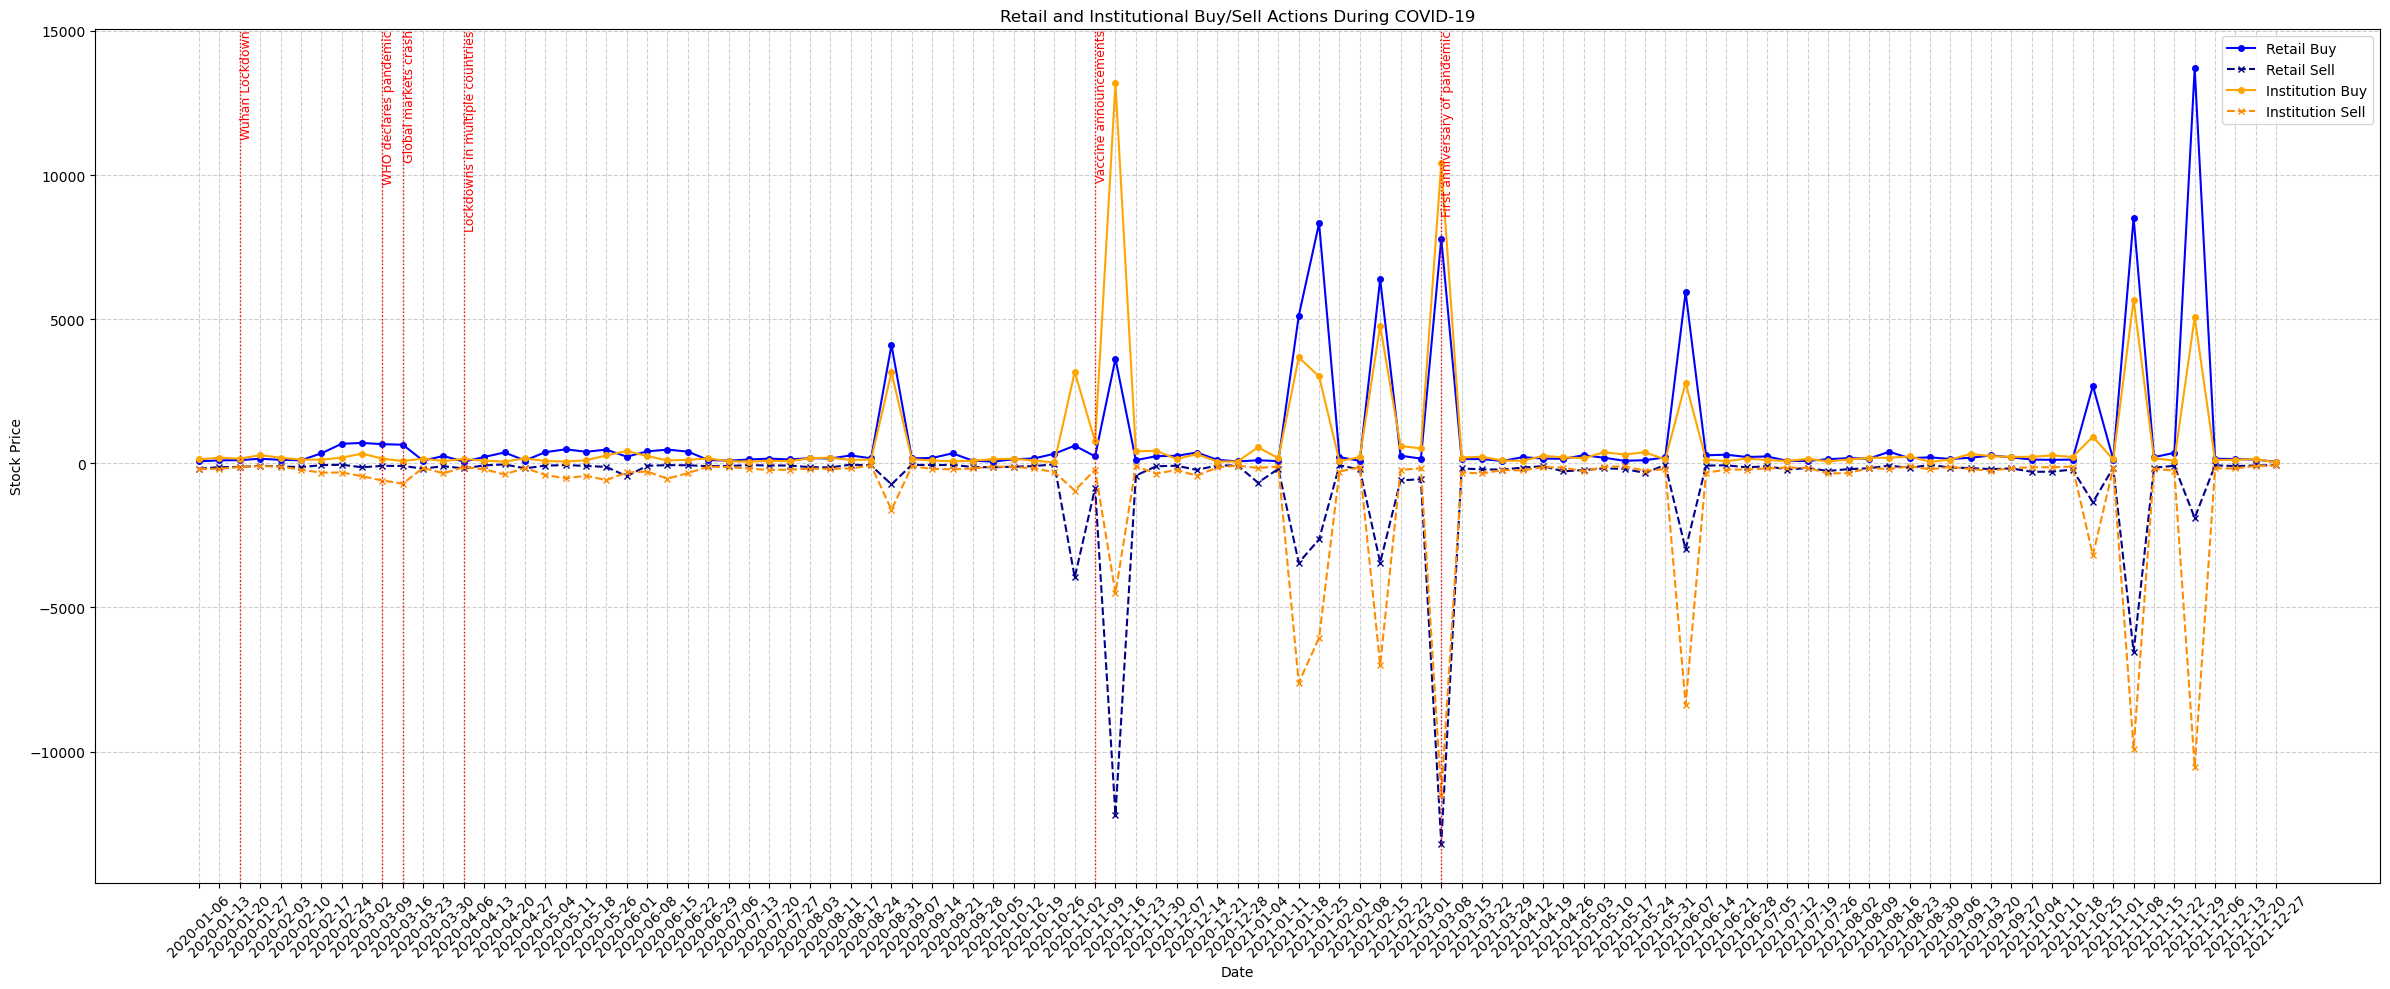

In [86]:
# Filter for the COVID-19 period (for example: 2020-01-01 to 2021-12-31)
covid_period = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2021-12-31')]
# Aggregate data by date, investor type, and action (buy/sell)
covid_summary = covid_period.groupby(['Date', 'Investor_Type', 'Action']).agg({'Stock_Price': 'sum'}).reset_index()

# Separate data for each type and action
retail_buy = covid_summary[(covid_summary['Investor_Type'] == 'retail') & (covid_summary['Action'] == 'buy')]
retail_sell = covid_summary[(covid_summary['Investor_Type'] == 'retail') & (covid_summary['Action'] == 'sell')]
institution_buy = covid_summary[(covid_summary['Investor_Type'] == 'institution') & (covid_summary['Action'] == 'buy')]
institution_sell = covid_summary[(covid_summary['Investor_Type'] == 'institution') & (covid_summary['Action'] == 'sell')]

# Plotting
plt.figure(figsize=(24, 10))

# Plot each subset with distinct styles
plt.plot(retail_buy['Date'], retail_buy['Stock_Price'], label="Retail Buy", marker='o', linestyle='-', markersize=4, color='blue')
plt.plot(retail_sell['Date'], retail_sell['Stock_Price'], label="Retail Sell", marker='x', linestyle='--', markersize=4, color='darkblue')
plt.plot(institution_buy['Date'], institution_buy['Stock_Price'], label="Institution Buy", marker='o', linestyle='-', markersize=4, color='orange')
plt.plot(institution_sell['Date'], institution_sell['Stock_Price'], label="Institution Sell", marker='x', linestyle='--', markersize=4, color='darkorange')
# COVID-19 event markers
covid_events = {
    '2020-01-20': 'Wuhan Lockdown',
    '2020-03-09': 'WHO declares pandemic',
    '2020-03-16': 'Global markets crash',
    '2020-04-06': 'Lockdowns in multiple countries',
    '2020-11-09': 'Vaccine announcements',
    '2021-03-08': 'First anniversary of pandemic'
}

# covid_events = {
#     '2020-01-23': 'Wuhan Lockdown',
#     '2020-03-11': 'WHO declares pandemic',
#     '2020-03-23': 'Global markets crash',
#     '2020-04-07': 'Lockdowns in multiple countries',
#     '2020-11-09': 'Vaccine announcements',
#     '2021-03-11': 'First anniversary of pandemic'
# }

# Mark important events
for event_date, event_name in covid_events.items():
    plt.axvline(x=event_date, color='red', linestyle=':', linewidth=1)
    plt.text(event_date, plt.ylim()[1], event_name, rotation=90, verticalalignment='top', color='red', fontsize=9)

# Labeling and formatting
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Retail and Institutional Buy/Sell Actions During COVID-19')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

- Wuhan Lockdown (January 2020): The first noticeable event is the Wuhan lockdown. There doesn’t appear to be an immediate, significant change in fund flows right after this announcement, which may indicate initial uncertainty or lack of global response in the market.
- WHO Declares Pandemic (March 2020): Following the WHO’s declaration, there is a notable increase in volatility for both retail and institutional investors. Fund flows start showing larger fluctuations as both groups react to the impending global crisis. This event seems to have triggered increased buying and selling as investors attempted to adjust their portfolios in response to the anticipated market downturn.
- Global Markets Crash (March 2020): Shortly after the pandemic announcement, global markets saw a sharp crash. The chart reflects this with substantial spikes and dips, especially in retail investor actions. Retail investors seem to have reacted quickly, possibly with panic selling, while institutions also show significant but somewhat smaller movements, indicating a more measured response.
- Vaccine Announcements (late 2020): The news of vaccine rollouts led to positive responses, especially from institutional investors, who showed a spike in buying activity, reflecting optimism about an economic recovery. Retail investors also reacted positively, though their buying and selling patterns remain more erratic than those of institutions.

Both retail and institutional investors demonstrate synchronized sell-offs around significant downturns, but institutions tend to recover and reinvest more quickly compared to retail. The chart shows large downward spikes followed by subsequent buying activity, particularly from institutions, who might be capitalizing on lower prices for long-term gains.
Retail investors, on the other hand, have more scattered buy and sell actions, suggesting less conviction in their recovery trades and possibly higher susceptibility to market sentiment.

In [58]:
print(stock_df.head())
print(stock_df.describe())

         Date      Open      High       Low     Close   Volume Stock Code
0  2019-01-07  2.766110  2.802387  2.747972  2.793318  4266142        BN4
1  2019-01-14  2.788784  2.815991  2.788784  2.806922  2700787        BN4
2  2019-01-21  2.847733  2.847733  2.797853  2.797853  4183780        BN4
3  2019-01-28  2.770645  2.775180  2.752507  2.761576  5377953        BN4
4  2019-02-04  2.725299  2.725299  2.725299  2.725299        0        BN4
               Open          High           Low         Close        Volume
count  45661.000000  45661.000000  45661.000000  45661.000000  4.566100e+04
mean       2.198436      2.221248      2.177087      2.199407  4.793740e+06
std        5.540646      5.604349      5.484996      5.545752  1.592311e+07
min       -0.372482     -0.379380     -0.372482     -0.379380  0.000000e+00
25%        0.221385      0.225000      0.219635      0.222380  9.810000e+04
50%        0.562021      0.567934      0.555817      0.562021  9.332000e+05
75%        1.513927     

In [63]:
# 每个股票的return,return=（今天的股票价格-昨天的股票价格）/昨天的股票价格
stock_df['Return'] = stock_df.groupby('Stock Code')['Close'].pct_change()
stock_df['Next_Day_Return'] = stock_df['Return'].shift(-1)
print(stock_df.head())
print(stock_df.tail())


         Date      Open      High       Low     Close   Volume Stock Code  \
0  2019-01-07  2.766110  2.802387  2.747972  2.793318  4266142        BN4   
1  2019-01-14  2.788784  2.815991  2.788784  2.806922  2700787        BN4   
2  2019-01-21  2.847733  2.847733  2.797853  2.797853  4183780        BN4   
3  2019-01-28  2.770645  2.775180  2.752507  2.761576  5377953        BN4   
4  2019-02-04  2.725299  2.725299  2.725299  2.725299        0        BN4   

     Return  Next_Day_Return  
0       NaN         0.004870  
1  0.004870        -0.003231  
2 -0.003231        -0.012966  
3 -0.012966        -0.013136  
4 -0.013136         0.003328  
             Date   Open   High    Low  Close  Volume Stock Code    Return  \
45656  2024-09-23  0.187  0.188  0.186  0.188  340100        B69  0.010753   
45657  2024-09-30  0.190  0.190  0.189  0.189  207100        B69  0.005319   
45658  2024-10-07  0.191  0.193  0.190  0.192  470000        B69  0.015873   
45659  2024-10-14  0.191  0.193  0.191 

In [69]:
stock_df.to_csv('./data/stock.csv', index=False)

In [68]:
# 读取data.csv
root='./data/'
df_name='data.csv'
data_path = os.path.join(root, df_name)
df= pd.read_csv(data_path)

df.head()


,Date,Stock Name,Stock Code,Amount,Investor Type,Action
0,2019-01-07,Keppel Corporation,BN4,-20.708603,retail,sell
1,2019-01-07,CapitaLand Mall Trust,C38U,5.340867,retail,buy
2,2019-01-07,Hi-P International,H17,5.099238,retail,buy
3,2019-01-07,Silverlake Axis,5CP,5.098878,retail,buy
4,2019-01-07,Best World International,CGN,3.879127,retail,buy


In [77]:
# 合并数据集
df_merge = df.merge(stock_df[['Stock Code', 'Date', 'Next_Day_Return']], left_on=['Stock Code', 'Date'], right_on=['Stock Code', 'Date'], how='left')

# 重命名列
df_merge = df_merge.rename(columns={'Next_Day_Return': 'Return After'})

print(df_merge.head())

         Date                Stock Name Stock Code     Amount Investor Type  \
0  2019-01-07        Keppel Corporation        BN4 -20.708603        retail   
1  2019-01-07     CapitaLand Mall Trust       C38U   5.340867        retail   
2  2019-01-07        Hi-P International        H17   5.099238        retail   
3  2019-01-07           Silverlake Axis        5CP   5.098878        retail   
4  2019-01-07  Best World International        CGN   3.879127        retail   

  Action  Return After  
0   sell      0.004870  
1    buy      0.004310  
2    buy           NaN  
3    buy      0.012346  
4    buy           NaN  


In [81]:
df_merge.dropna(inplace=True)
df_merge.to_csv('./data/data_merge.csv', index=False)

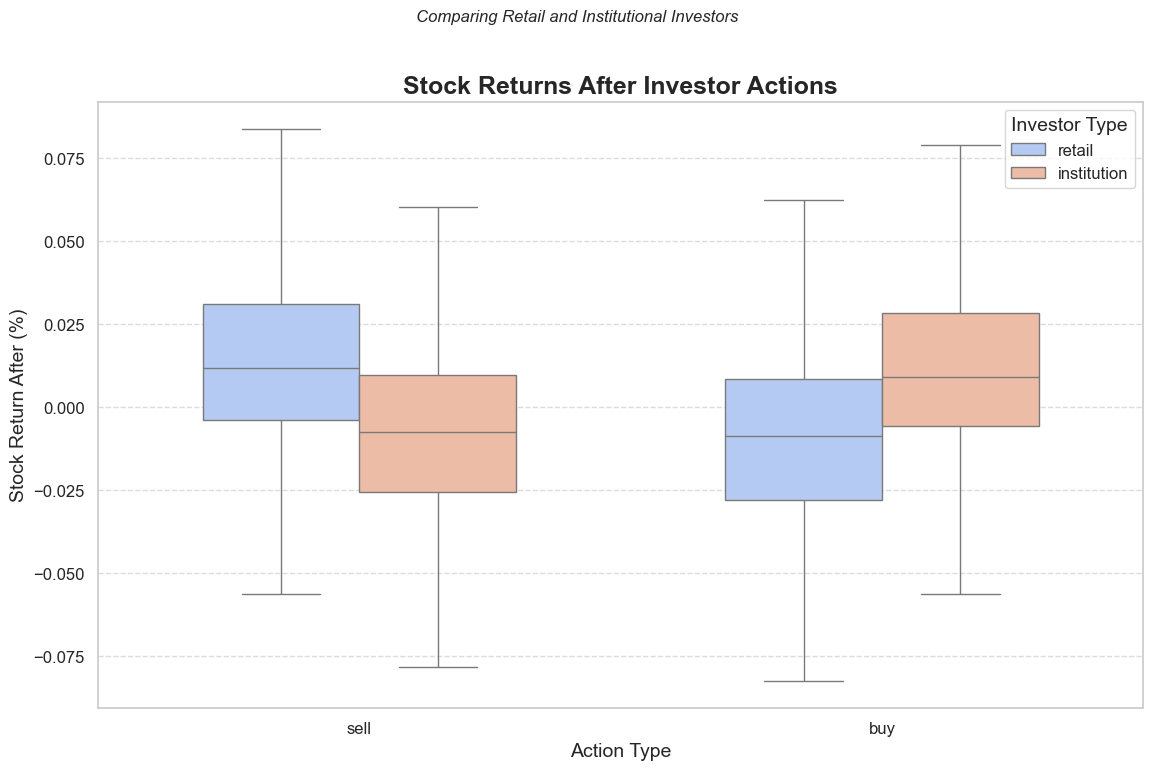

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size for larger spacing
plt.figure(figsize=(12, 8))  # Increased width for more spacing
sns.set_theme(style="whitegrid")

# Enhanced boxplot with wider spacing
sns.boxplot(
    data=df_merge,
    x='Action',
    y='Return After',
    hue='Investor Type',
    palette='coolwarm',
    showfliers=False,
    width=0.6  # Adjust the box width to create more spacing
)

# Add titles and labels
plt.title('Stock Returns After Investor Actions', fontsize=18, fontweight='bold')
plt.suptitle('Comparing Retail and Institutional Investors', fontsize=12, style='italic')
plt.xlabel('Action Type', fontsize=14)
plt.ylabel('Stock Return After (%)', fontsize=14)

# Customize the legend
plt.legend(title='Investor Type', fontsize=12, title_fontsize=14)

# Adjust gridlines and ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)  # Adjust font size
plt.yticks(fontsize=12)
plt.tight_layout(pad=2)  # Add padding for better layout

# Show the plot
plt.show()


- Institutional investors' sell actions have a slightly lower and more negative median return compared to retail, suggesting institutions might be exiting positions when they predict a downturn.
- The IQR for retail investors in the "buy" category is slightly wider than that for institutions, indicating more variability in the outcomes of their buying decisions.
- Institutional investors appear to have more consistent and less variable stock return outcomes compared to retail investors. While both groups achieve modest positive returns on buying and neutral to slightly negative returns on selling, the variability in retail performance highlights the differences in strategy sophistication.